Perceptron algorithm, simply calculate 'w' in process of determining the decision boundary but in this we are not concerned about the margin. Thus, if the data is linearly separable, perceptron could be a regarded as a competent classifier.

## Loading data 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data_1=np.genfromtxt('C:/Users/deshw/Downloads/Datasets ML/perceptron_at_work/data_1.txt')
data_2=np.genfromtxt('C:/Users/deshw/Downloads/Datasets ML/perceptron_at_work/data_2.txt')

### Classification algorithm using perceptron

In [2]:
def classifier(w,b,pt):
    val=np.dot(w,pt)+b
    if val > 0:
        return 1
    elif val <= 0:
        return -1

### Learning algorithm used by perceptron

In [3]:
def train_model(x,y,max_iter=100):
    w=np.zeros(x.shape[1])
    alpha=np.zeros(x.shape[0])
    b=0
    iter=0
    done=False
    converged=True
    
    while not(done):
        done=True
        
        for i in range(0,len(x)):
            if classifier(w,b,x[i])!=int(y[i]):
                w=w+y[i]*x[i]
                b=b+y[i]
                alpha[i]+=1
                done=False
                
        iter+=1
        if iter>max_iter:
            done=True
            converged=False
            
    if converged==False:
        print("Cannot be converged")
              
    else:
        print("Converged at",iter)
       
    return w,b,converged,alpha

### Evaluation the model

In [4]:
def colormesh(x,y,w,b,converged):
    plt.figure(figsize=(7,5))
    
    x1_max=max(x[:,0])+1
    x1_min=min(x[:,0])-1
    x2_max=max(x[:,1])+1
    x2_min=min(x[:,1])-1
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    
    x1=np.arange(x1_min,x1_max,0.05)
    x2=np.arange(x2_min,x2_max,0.05)    
    xx1,xx2=np.meshgrid(x1,x2)
    
    for i in range(len(x)):
        
        if y[i]==1:
            plt.plot(x[i,0],x[i,1],'ro',markersize=marksize[i])
        else:
            plt.plot(x[i,0],x[i,1],'k^',markersize=marksize[i])

    if converged:
        pts=np.c_[xx1.ravel(),xx2.ravel()]
        z=[classifier(w,b,pt) for pt in pts]
        z=np.reshape(z,xx1.shape)
        plt.gcf()
        plt.pcolormesh(xx1,xx2,z,cmap=plt.cm.PRGn,vmin=-3,vmax=3)
        
        y_txt=np.median(x2)
        x_txt=-(w[1]*y_txt+b)/w[0]
        rot=np.arctan(w[1]/w[0])*(180/np.pi)
        plt.text(x_txt-0.5,y_txt,'wx+b=0',rotation=rot-85,fontsize=12,weight='bold')

    plt.title("Distribution of points in x plane with decision boundry",fontsize=14,weight='bold')
    plt.xlabel('Feature 1',fontsize=13)
    plt.ylabel('Feature 2',fontsize=13)
    plt.legend()    
    plt.show()
    
    

In [5]:
def Test(data,mi=100):
    x=data[:,0:2]
    y=data[:,-1]
    w,b,converged=train_model(x,y,max_iter=mi)
    colormesh(x,y,w,b,converged)

### Testing

Testing with 'data_1'

Converged at 21


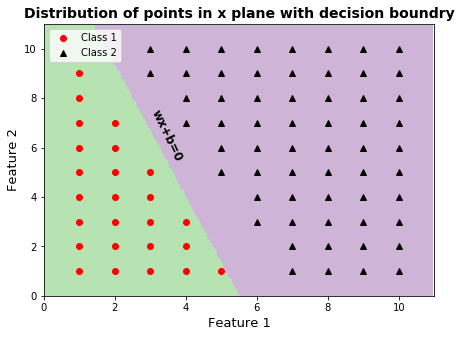

In [7]:
Test(data_1)

Testing with 'data_2

Cannot be converged


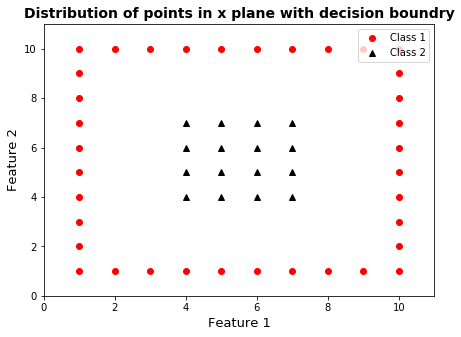

In [8]:
Test(data_2)

Designing a dataset

In [9]:
def gen_data(size=500,scale=0.25):
    np.random.seed(1000)
    x=np.random.normal(size=(size,2),loc=0,scale=scale)
    w0=np.ones(2)
    y0=x.dot(w0)
    i=0
    y=np.zeros(size)
    for value in y0:
        if value>0:
            y[i]=1
        else:
            y[i]=-1
        i+=1
    data_3=np.c_[x,y]   
    return data_3

Converged at 2


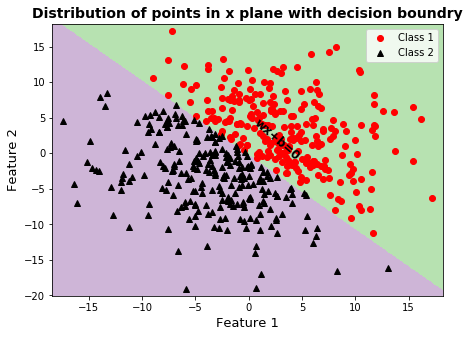

In [10]:
data=gen_data(500,6)
Test(data,1000)

In [82]:
def colormesh2(x,y,w,b,converged,alpha):
    plt.figure(figsize=(7,5))
    
    x1_max=max(x[:,0])+1
    x1_min=min(x[:,0])-1
    x2_max=max(x[:,1])+1
    x2_min=min(x[:,1])-1
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    
    x1=np.arange(x1_min,x1_max,0.05)
    x2=np.arange(x2_min,x2_max,0.05)    
    xx1,xx2=np.meshgrid(x1,x2)
    
    marksize=np.ones(len(x))*5
    ind=np.where(alpha>1)
    marksize[ind]=10
    
    for i in range(len(x)):
        
        if y[i]==1:
            plt.plot(x[i,0],x[i,1],'ro',label="Class 1",markersize=marksize[i])
        else:
            plt.plot(x[i,0],x[i,1],'k^',label='Class 2',markersize=marksize[i])

    if converged:
        pts=np.c_[xx1.ravel(),xx2.ravel()]
        pts=PF.fit_transform(pts)
        z=[classifier(w,b,pt) for pt in pts]
        z=np.reshape(z,xx1.shape)
        plt.gcf()
        plt.pcolormesh(xx1,xx2,z,cmap=plt.cm.PRGn,vmin=-3,vmax=3)

    plt.title("Distribution of points in x plane with decision boundry",fontsize=14,weight='bold')
    plt.xlabel('Feature 1',fontsize=13)
    plt.ylabel('Feature 2',fontsize=13)
    plt.show()
    

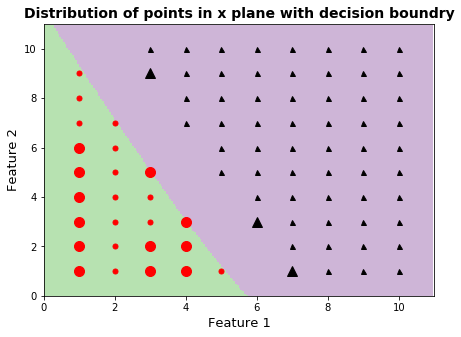

In [83]:
colormesh2(x,y,w,b,con,alpha)